In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tools import merge_matrix, hic_norm, clean_matrix

In [30]:
hr_path = '/data1/lmh_data/MMSR_complete/train/hr/chr19_1000b.npz'
hr = np.load(hr_path)['hic'].astype(float)
print(hr.shape)

significant_path = '/data1/lmh_data/MMSR_complete/source/annotation/test_1/npy/chr19_1000b.npz'
significant = np.load(significant_path)['hic']
print(significant.shape)

(147, 5, 400, 400)
(58618, 58618)


In [31]:
hr = merge_matrix(hr)
hr = np.triu(hr).T + np.triu(hr)

for i in range(hr.shape[0]):
    if i >= significant.shape[0]:
        break
    if significant[i, :].sum() != 0 or significant[:, i].sum() != 0:
        continue
    hr[i, :] = hr[:, i] = 0

hr = hic_norm(hr)

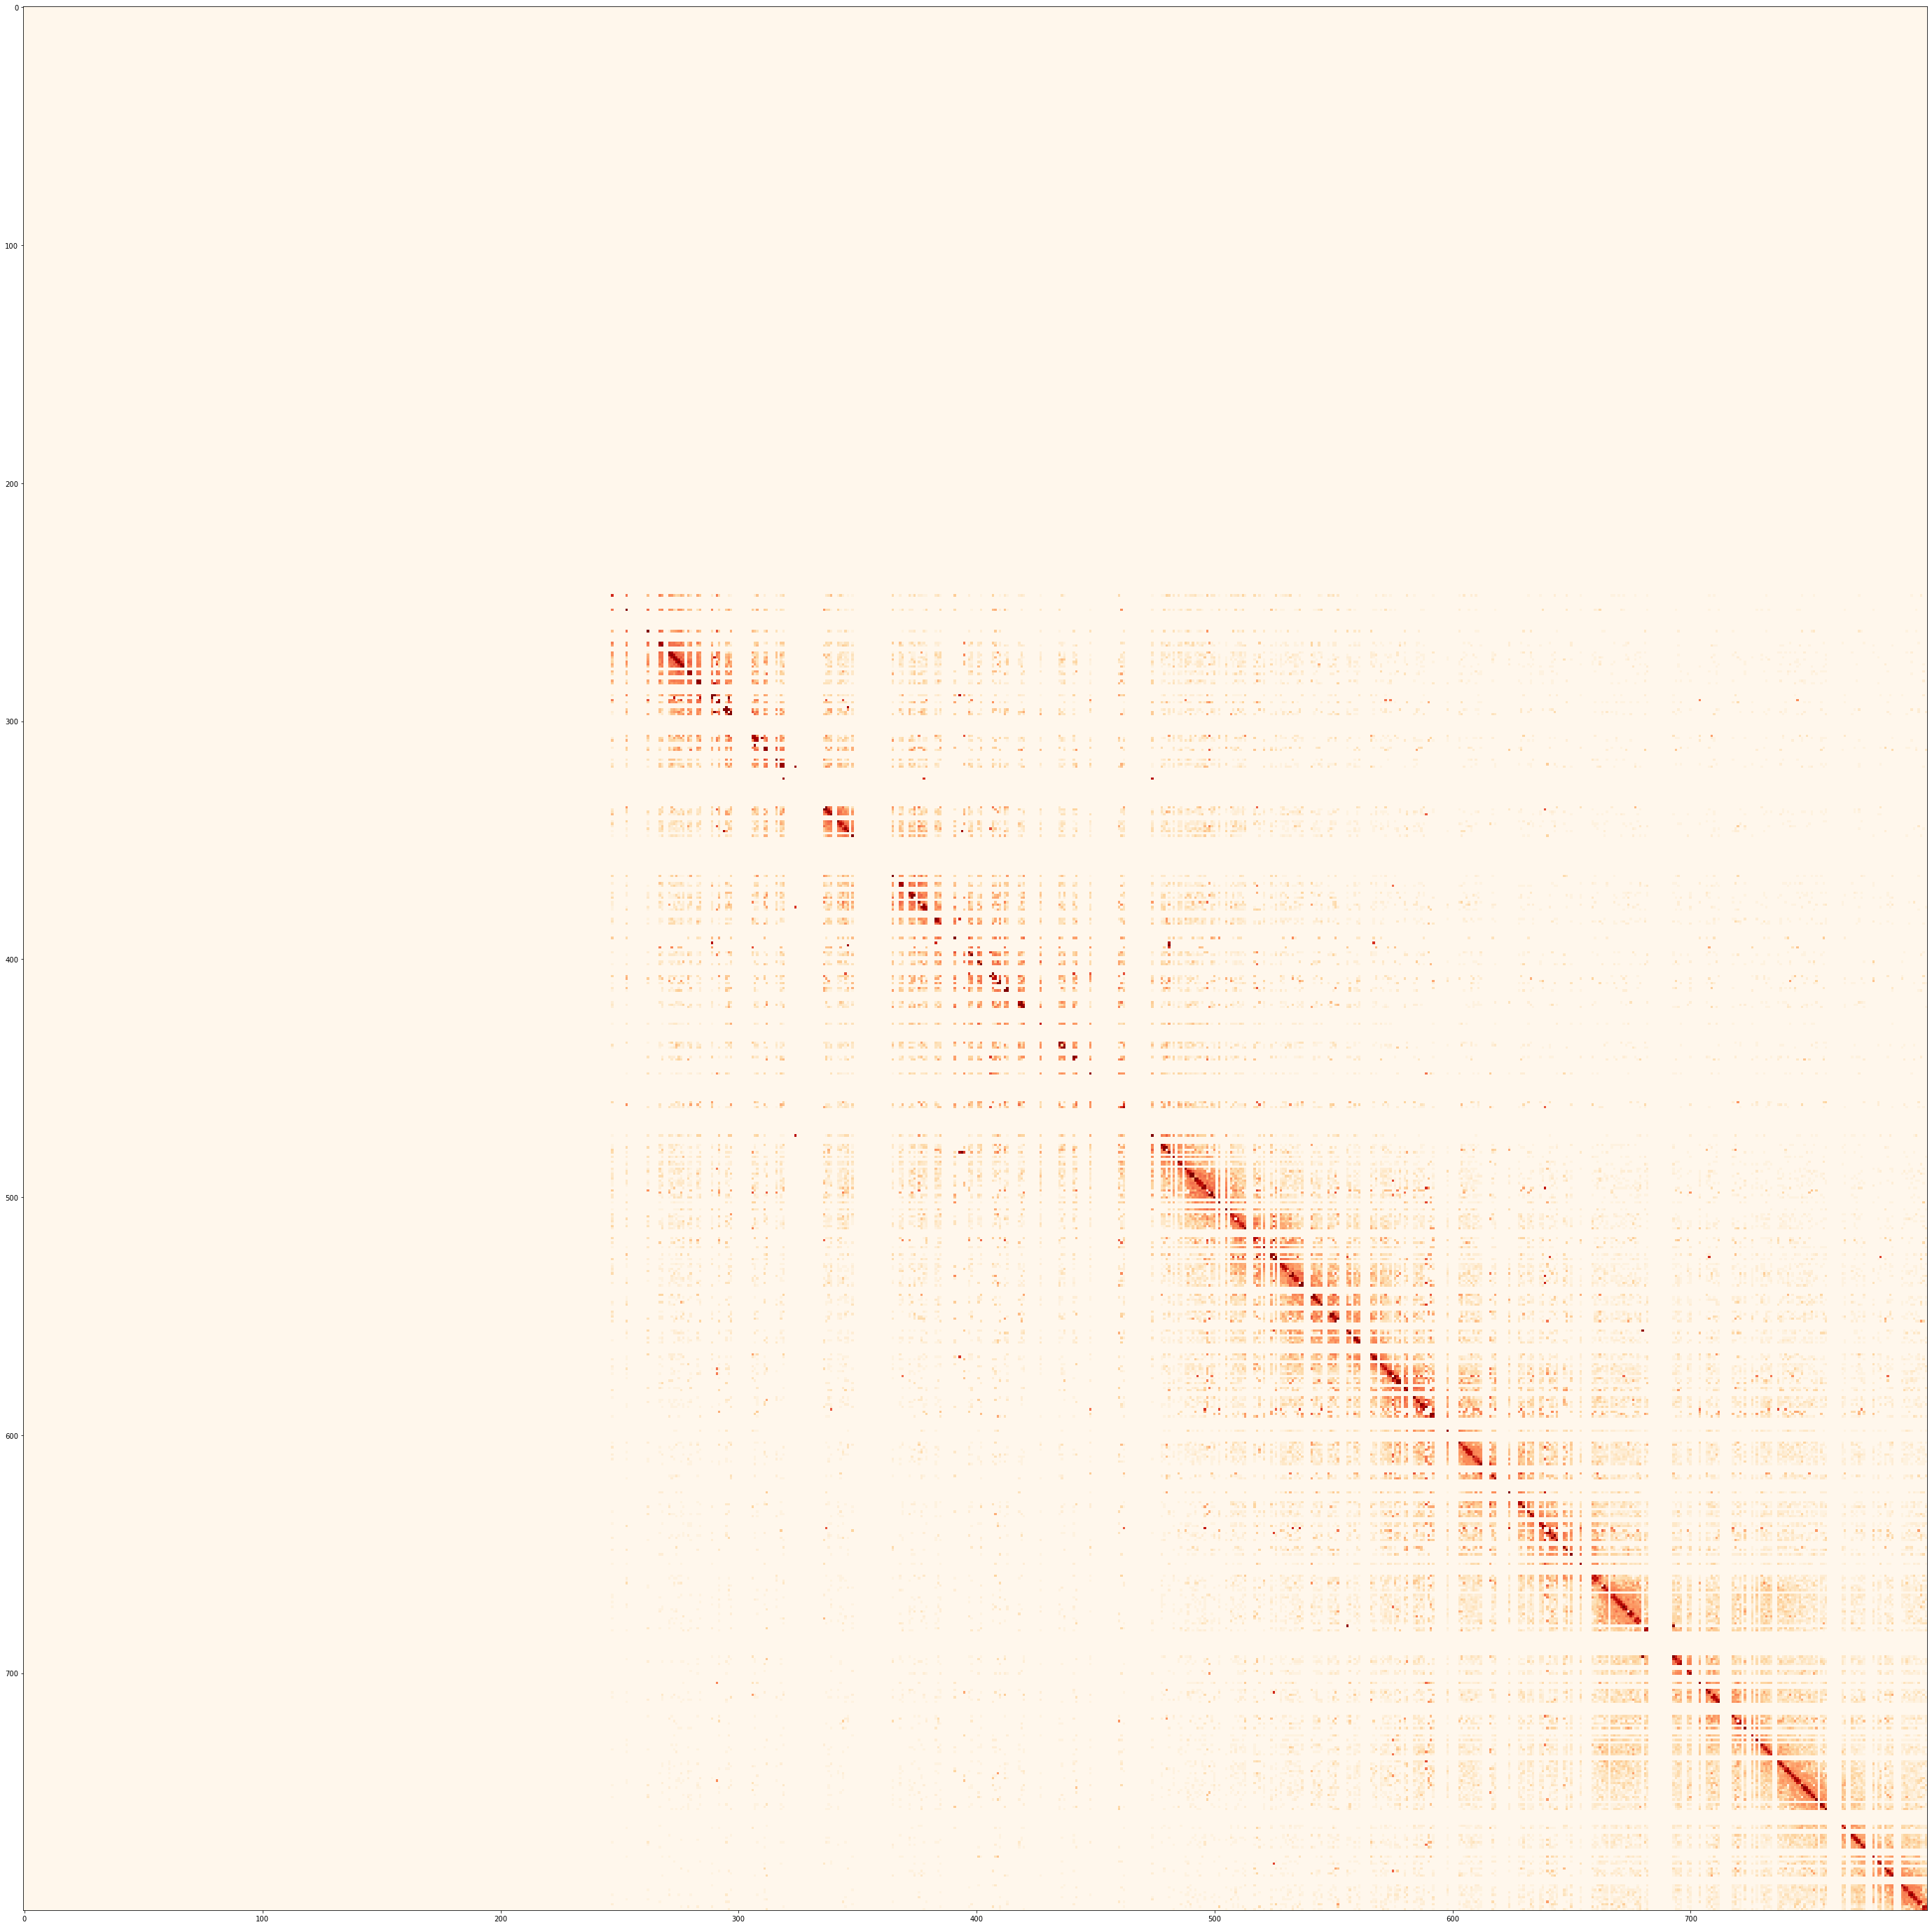

In [32]:
min_pos, max_pos = 0, 800
plt.figure(figsize=(50, 50))
plt.imshow(hr[min_pos:max_pos, min_pos:max_pos], cmap=plt.cm.get_cmap('OrRd'))
plt.show()

In [19]:
chrom = 'chr19'
masks = []

import csv
from enum import Enum


class Position(Enum):
    enhancer_chrom = 1
    enhancer_end = 3
    enhancer_start = 5
    label = 6
    promoter_chrom = 7
    promoter_end = 8
    promoter_start = 10


with open('/data1/lmh_data/MMSR_complete/source/annotation/EPI_DLMH/data/GM12878.csv', 'r') as f:
    reader = csv.reader(f)
    # print(type(reader))
    headers = next(reader)
#     print(headers)
    
    for row in reader:
        if row[Position.label.value] == "1":
            continue
        if row[Position.enhancer_chrom.value] != row[Position.promoter_chrom.value]:
            continue
        if row[Position.enhancer_chrom.value] != chrom:
            continue

        enhancer_start = int(int(row[Position.enhancer_start.value]) / 1000)
        enhancer_end = int(int(row[Position.enhancer_end.value]) / 1000)
        promoter_start = int(int(row[Position.promoter_start.value]) / 1000)
        promoter_end = int(int(row[Position.promoter_end.value]) / 1000)

        for enhancer_position in range(enhancer_start, enhancer_end + 1):
            for promoter_position in range(promoter_start, promoter_end + 1):
                masks.append((enhancer_position, promoter_position))

59005 59065
59005 59066
59005 59067
59096 59054
59096 59055
59096 59056
59096 59057
59096 59058
59005 58950
59005 58951
59005 58952
59090 59065
59090 59066
59090 59067
59049 59083
59049 59084
59049 59085
58977 58918
58977 58919
58977 58920
58977 58921
58978 58918
58978 58919
58978 58920
58978 58921
59050 58978
59050 58979
59015 59065
59015 59066
59015 59067
59096 59068
59096 59069
59096 59070
59096 59071
58858 58950
58858 58951
58858 58952
59090 58962
59090 58963
58917 58816
58917 58817
59005 58918
59005 58919
59005 58920
59005 58921
59006 58918
59006 58919
59006 58920
59006 58921
58977 59068
58977 59069
58977 59070
58977 59071
58978 59068
58978 59069
58978 59070
58978 59071
58666 58816
58666 58817
58976 58816
58976 58817
59000 58896
59000 58897
59000 58898
59000 58899
59001 58896
59001 58897
59001 58898
59001 58899
59049 58962
59049 58963
58962 59054
58962 59055
58962 59056
58962 59057
58962 59058
59049 58912
59049 58913
59096 58896
59096 58897
59096 58898
59096 58899
58875 58666
5887

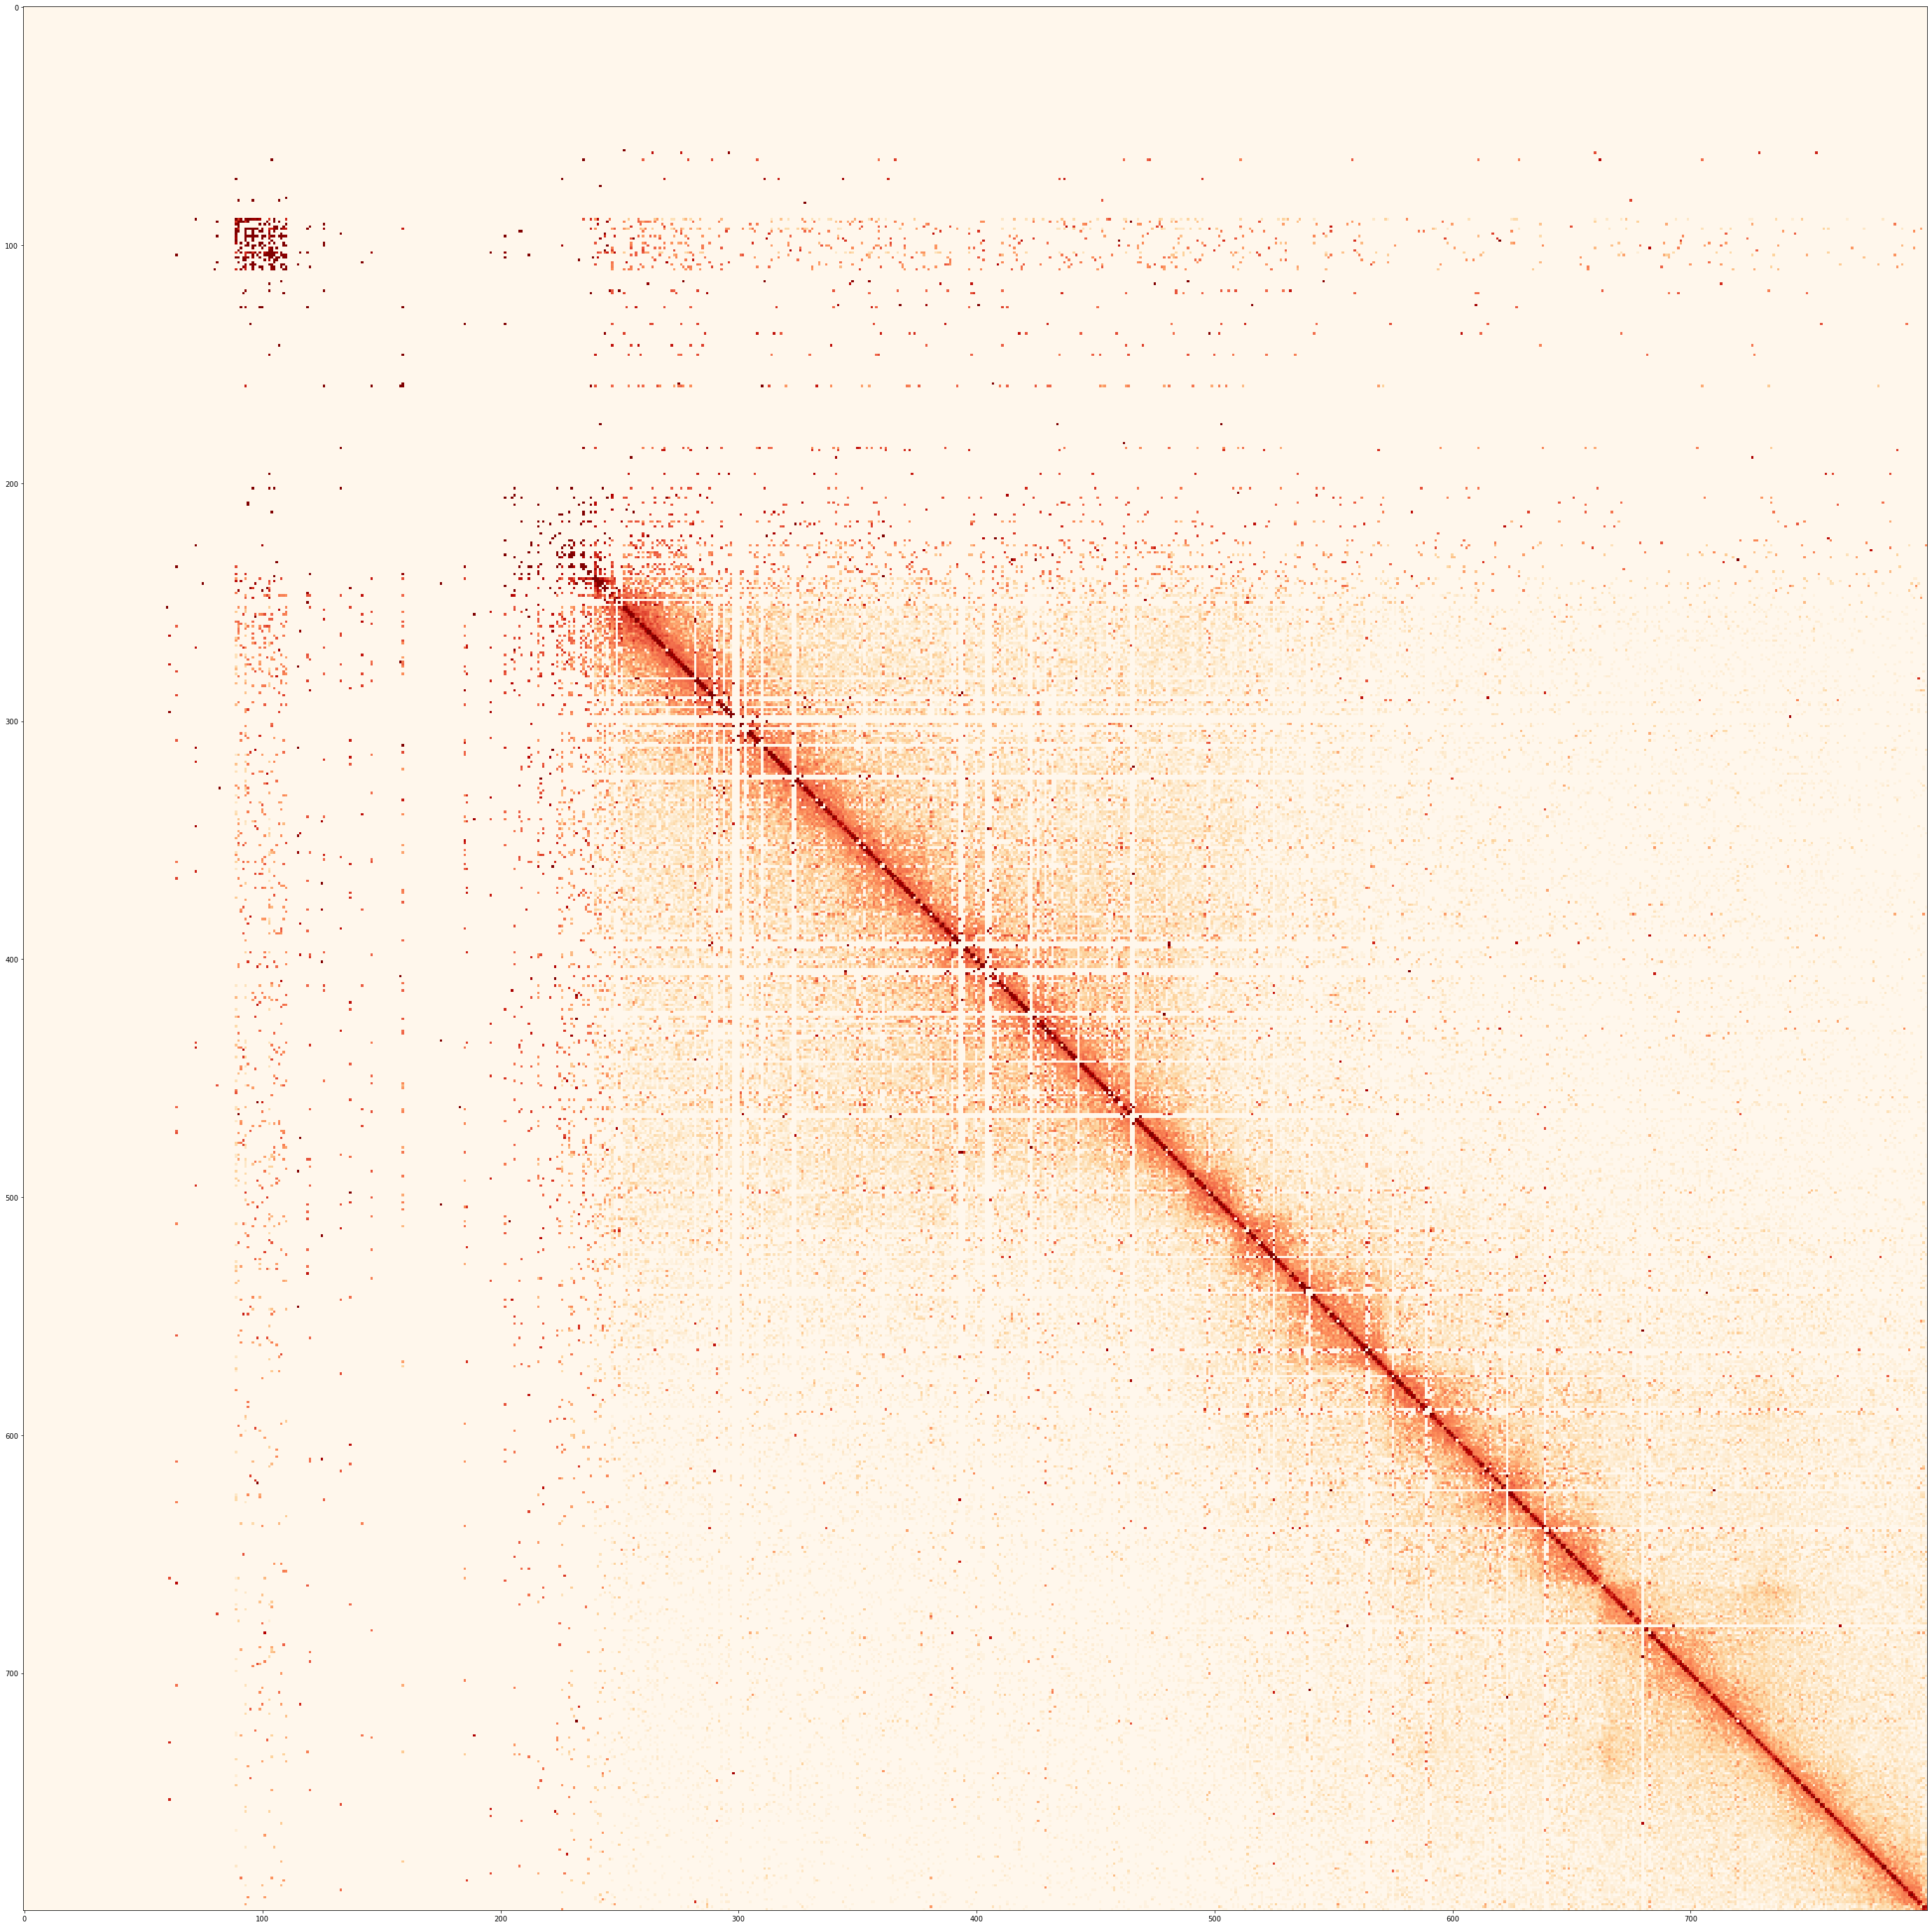

In [22]:
mask_hr = hr
for mask in masks:
    if mask[0] >= mask_hr.shape[0] or mask[1] >= mask_hr.shape[0]:
        print(str(mask[0]) + " " + str(mask[1]))
        continue
    mask_hr[mask[0], mask[1]] = mask_hr[mask[1], mask[0]] = 0

min_pos, max_pos = 0, 800
plt.figure(figsize=(50, 50))
plt.imshow(mask_hr[min_pos:max_pos, min_pos:max_pos], cmap=plt.cm.get_cmap('OrRd'))
plt.show()